# Analysing Exit Surveys from DETE and TAFE (Queensland)

## What is contained in the data sets?

#### The data sets contain information about former Queensland DETE (Department of Education, Training and Employment) and TAFE (Technical and Further Education) employees. Specifically it contains the information about the length of employment and the reason for why their employment ended.


## Questions

### 1) Are employees who worked for a short time resigning due to some kind of dissatisfaction?

### 2) Same as question 1 for the employees who have worked at the organisations for a long time.


#### Simple analysis as mainly about cleaning and preparing the data.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [50]:
dete_survey = pd.read_csv('C:/Users/james/Desktop/Imediate Projects/Python/dete_survey.csv', encoding='Latin', na_values='Not Stated')
tafe_survey = pd.read_csv('C:/Users/james/Desktop/Imediate Projects/Python/tafe_survey.csv', encoding='Latin')

In [51]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [52]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

#### Checking the ammount of nulls as a percentage

In [53]:
for i in dete_survey.columns[1:]:
    print(dete_survey[i].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
NaN         34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
02/2014      2
04/2013      2
08/2012      2
04/2014      2
07/2014      2
09/2014      1
07/2006      1
2014         1
09/2010      1
11/2012      1
07/2012      1
2010         1
Name: Cease Date, dtype: int64
NaN        73
 2011.0    40
 2007.0    34
 2008.0    31
 2010.0    27
 2012.0    27
 2009.0    24
 2006.0    23
 1970.0    21
 1975.0    21
 2013.0    21
 2005.0  

In [54]:
for i in tafe_survey.columns[1:]:
    print(tafe_survey[i].value_counts(dropna=False))

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64
 2011.0    268
 2012.0    235
 2010.0    103
 2013.0     85
NaN          7
 2009.0      4
Name: CESSATION YEAR, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                 

Agree                237
Strongly Agree       137
NaN                   94
Neutral               93
Disagree              84
Strongly Disagree     51
Not Applicable         6
Name: WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job, dtype: int64
Agree                296
Strongly Agree       134
Neutral               99
NaN                   91
Disagree              45
Strongly Disagree     30
Not Applicable         7
Name: WorkUnitViews. Topic:23. My job provided sufficient variety, dtype: int64
Agree                298
Strongly Agree       148
NaN                   92
Neutral               91
Disagree              45
Strongly Disagree     22
Not Applicable         6
Name: WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job, dtype: int64
Agree                290
Strongly Agree       141
Neutral               93
NaN                   91
Disagree              53
Strongly Disagree     29
Not Applicable         5
Name

#### With a quick look of the value counts above a few things are quickly noticed. Such as the majority of the employees ceasing employment were female and the majority of employees leaving were +56 years of age.

#### There are many columns that reapeat the same information so I will be dropping them as they are redundant.

In [55]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1).copy()
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1).copy()

In [56]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [57]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [58]:
tafe_survey_updated.rename({'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'},
                          axis=1, inplace=True)

In [59]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

#### I will be eventually combining the two tables hence why I am standardising the table column names

In [60]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [61]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

#### I will now extract just the rows with resignation as the separation type (preparing the data for our analysis).

In [62]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation', regex=False)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False, regex=False)].copy()

In [63]:
print(dete_resignations['separationtype'].value_counts())
tafe_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


Resignation    340
Name: separationtype, dtype: int64

In [64]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [65]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

In [66]:
dete_resignations.loc[:,'cease_date'] = dete_resignations.loc[:,'cease_date'].str.replace('^[0-9][0-9]/','').astype(float)

### Usually I would round the years depending on if it was over the 6 month mark or under but in the interest of a quick analysis I will leave this part out

In [67]:
dete_resignations['cease_date'].value_counts(dropna=False).index

Float64Index([2013.0, 2012.0, 2014.0, nan, 2010.0, 2006.0], dtype='float64')

In [68]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64

#### Now I will create a new column for dete_resignations called institute service (the approximate length in years that the employee was employed).

In [69]:
dete_resignations.loc[:,'institute_service'] = dete_resignations.loc[:,'cease_date'] - dete_resignations.loc[:,'dete_start_date']

In [70]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

#### I will be picking certain columns (for the analysis) which I believe indicates the employee experienced some kind of dissatisfaction. If an employee has an entry in one of columns that indicate they experienced some kind of dissatisfaction, we will input a value of 1 in a new column called dissatisfied, otherwise a 0 will be entered.

#### Note that the dete_resignations dissatisfaction columns have values of True and False so I will need to convert the tafe_resignations dissatisfaction columns to have matching values (True and False) for the analysis.

In [71]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [72]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [73]:
tafe_resignations['Contributing Factors. Dissatisfaction'] = (
    tafe_resignations['Contributing Factors. Dissatisfaction'].str.contains('Contributing Factors. Dissatisfaction'))

In [74]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [75]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [76]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = (
tafe_resignations['Contributing Factors. Job Dissatisfaction'].str.contains('Job Dissatisfaction'))

In [77]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [78]:
tafe_resignations['dissatisfied'] = (
    tafe_resignations.loc[:,['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].apply(any,1))

In [79]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [80]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                                        'physical_work_environment','lack_of_recognition',
                                                        'lack_of_job_security','work_location','employment_conditions',
                                                        'work_life_balance','workload']].apply(any,1)

In [81]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [82]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [83]:
service_years_tafe_dict = {'3-4':'Experienced: 3-6 years', '7-10':'Established: 7-10 years', 
                           '1-2':'New: Less than 3 years','Less than 1 year':'New: Less than 3 years', 
                           '11-20':'Veteran: 11 or more years', '5-6':'Experienced: 3-6 years', 
                           'More than 20 years':'Veteran: 11 or more years'}

In [84]:
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].map(service_years_tafe_dict)

In [85]:
tafe_resignations['institute_service'].value_counts(dropna=False)

New: Less than 3 years       137
Experienced: 3-6 years        96
NaN                           50
Veteran: 11 or more years     36
Established: 7-10 years       21
Name: institute_service, dtype: int64

In [86]:
dete_resignations['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [87]:
def assign_service_description(element):
    
    if element < 3:
        element = 'New: Less than 3 years'  
    
    elif element >= 3 and element <= 6:
        element = 'Experienced: 3-6 years'
         
    elif element >= 7  and element <= 10:
        element = 'Established: 7-10 years'
         
    elif element >= 11:
        element = 'Veteran: 11 or more years'
    
    else:
        pass

    return element

In [88]:
dete_resignations['institute_service'] = dete_resignations['institute_service'].apply(assign_service_description)

#### I have put the service years into categories rather than individial years as it will be more meaningful for the analysis.

In [89]:
combined_updated = pd.concat([dete_resignations,tafe_resignations], join='outer', axis=0)

C:\Users\james\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [90]:
combined_updated['institute_service'].value_counts(dropna=False)

New: Less than 3 years       193
Experienced: 3-6 years       172
Veteran: 11 or more years    136
NaN                           88
Established: 7-10 years       62
Name: institute_service, dtype: int64

In [100]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

#### Now we can display the relative percentage of people who were dissatisfied for the particular service length

In [101]:
combined_updated.groupby('institute_service')['dissatisfied'].value_counts(normalize=True)*100

institute_service          dissatisfied
Established: 7-10 years    True            51.612903
                           False           48.387097
Experienced: 3-6 years     False           65.697674
                           True            34.302326
New: Less than 3 years     False           70.466321
                           True            29.533679
Veteran: 11 or more years  False           51.470588
                           True            48.529412
Name: dissatisfied, dtype: float64

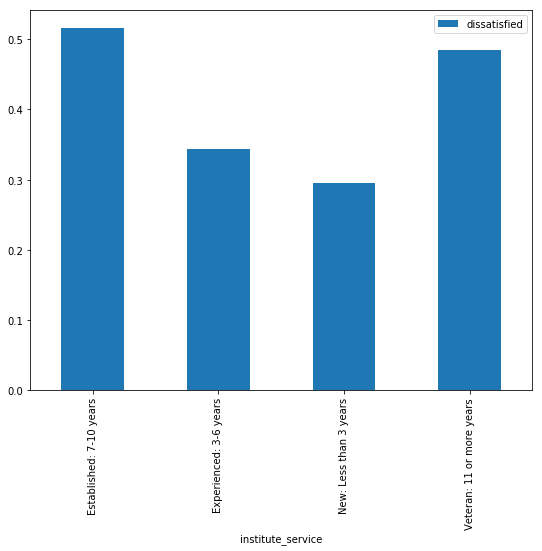

In [97]:
dissatisfied_table = combined_updated.pivot_table('dissatisfied','institute_service')
dissatisfied_table.plot(kind='bar', figsize=(9,7))
plt.show()

## Questions
### 1) Are employees who worked for a short time resigning due to some kind of dissatisfaction? <br>
#### The less experienced workers have a lower dissatisfaction population percentage in comparison <br> to the more experienced workers.


### 2) Same as question 1 for the employees who have worked at the organisations for a long time. <br> 
#### From the above two cells we can see that the Established group seems to be the most dissatisfied <br> followed closely by the Veteran group. 


### From this rather simple analysis we can see that there is a clear difference in the percentage of <br> Established and Veteran dissatisfied workers (being noticeably higher than the less experienced <br> groups). From this it could be that the longer people work the more dissatisfied they become with <br>any company (we would need more employee data from other companies for this perhaps using <br>cluster sampling). Another reason could be the employees start to realise the flaws within DETE <br>and TAFE after working there for an extended period of time. No doubt there are other possible <br>reasons that will be overlooked for now.
